# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [1]:
# Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

Отклоняем нулевую гипотезу, различия статистически значимы


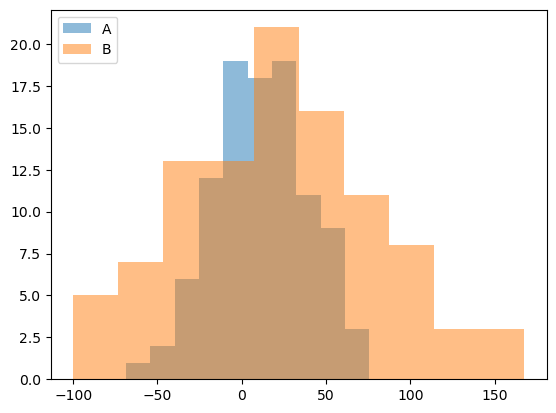

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

stat, p = stats.ttest_1samp(a=A, popmean=B.mean())

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, различия статистически не значимы")
else:
    print("Отклоняем нулевую гипотезу, различия статистически значимы")

plt.hist(A, bins=10, alpha = 0.5, label='A')
plt.hist(B, bins=10, alpha = 0.5, label='B')
plt.legend(loc='upper left')

Как поступить правильно, если у воды замеров меньше? Если заполнять NaN, то как понять,то куда имеено ставить?

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

21
Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 11.716417910447765


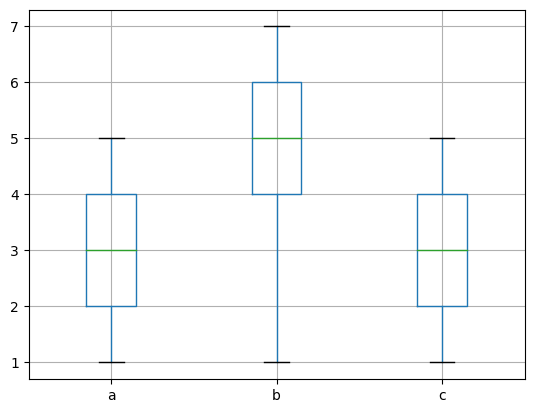

In [3]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1,5]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

print(len(mineral))

# Выборки которые надо сравнить
data =\
    pd.DataFrame({
        'a': water,
        'b': nutri,
        'c': mineral
    })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# Общая средняя
grand_mean = data.values.flatten().mean()
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in data.values.flatten())
# Отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in data.mean().items())
# Отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
# Степени свободы
dfb = groups - 1
dfw = data.size - groups
# Межгрупповой средний квадрат
mssb = ssb/dfb
# Внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")

Эффекты от минералки и удобрений как видно из боксплота различаются

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [4]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [5]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


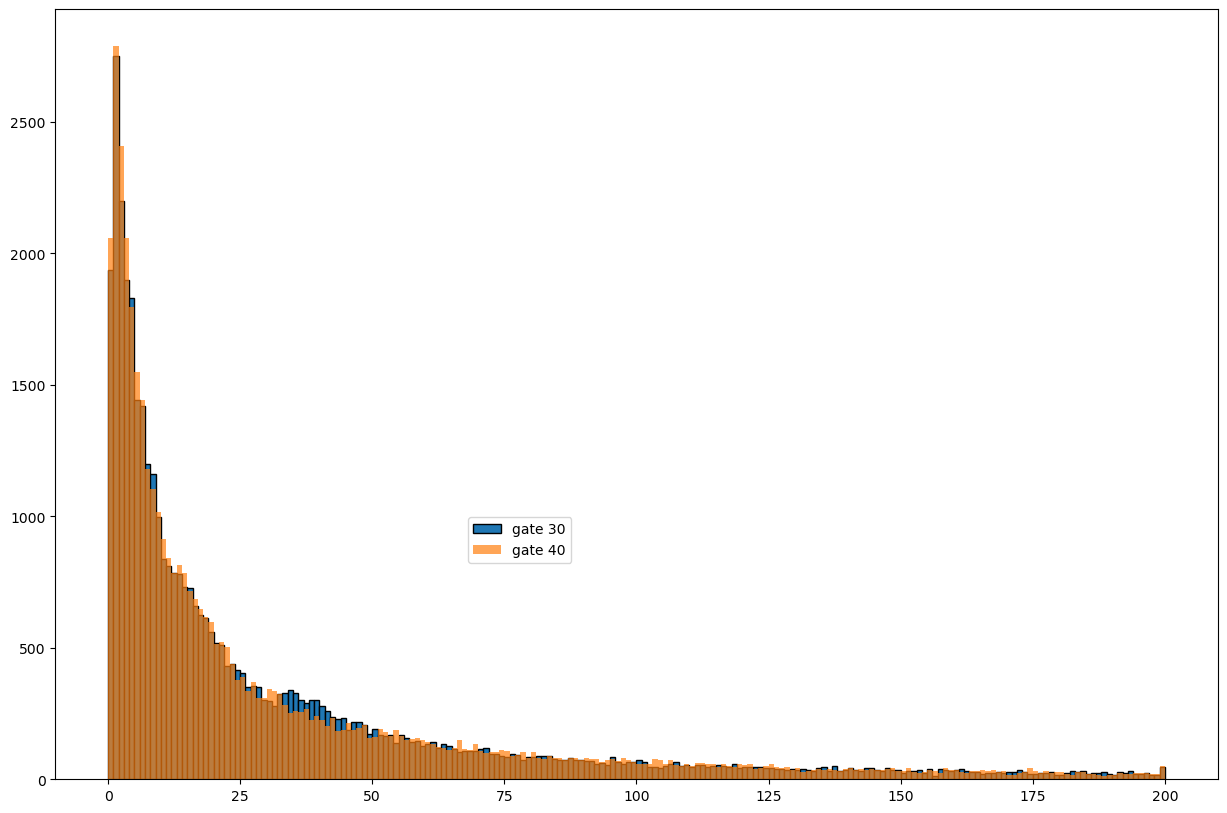

In [6]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

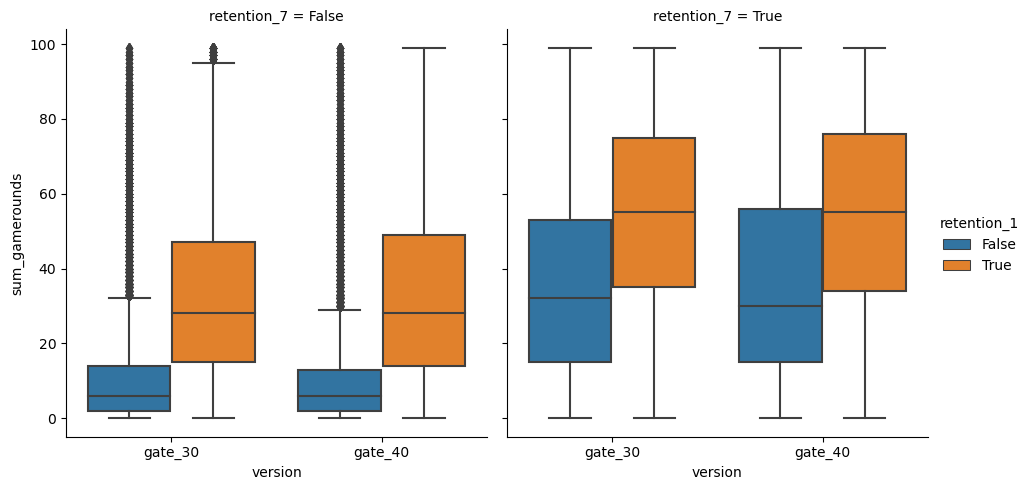

In [7]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


In [8]:
from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

f, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])

print(p)

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, различия статистически не значимы")
else:
    print("Отклоняем нулевую гипотезу, различия статистически значимы")

0.05020880772044255
Не отклоняем нулевую гипотезу, различия статистически не значимы


Пограничная ситуация, нужны дополнительные исследования

Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

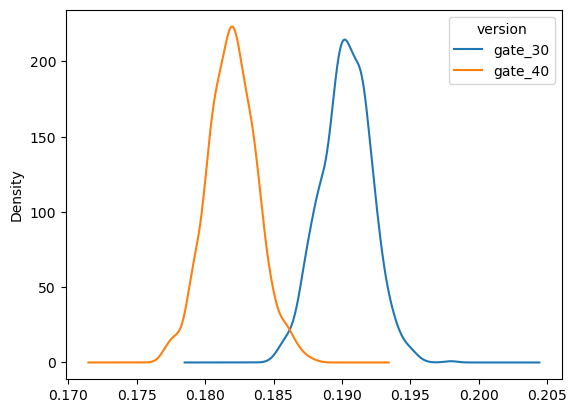

In [9]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [10]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

In [11]:
stat, p = f_test(boot_1d['gate_30'], boot_1d['gate_40'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=1.029, p=0.32437
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


In [12]:
stat, p = stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=101.435, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


<b>Выводы.</b> Наше значение $p$ близко к нулю, поэтому мы отвергаем нулевую гипотезу о том, что средние значения двух выборок одинаковые. То есть существует статистически значимая разница между тем где поставить ворота!

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [13]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path)
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [14]:
pokemon_grass = pokemon[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')) | ((pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] != 'Rock'))]
pokemon_rock = pokemon[((pokemon['Class 2'] != 'Grass') & (pokemon['Class 1'] == 'Rock')) | ((pokemon['Class 1'] != 'Grass') & (pokemon['Class 2'] == 'Rock'))]
print(np.var(pokemon_grass['Attack']), np.var(pokemon_rock['Attack']))
#Как правило, мы можем предположить, что совокупности имеют равные дисперсии, если отношение большей выборочной дисперсии к меньшей выборочной дисперсии составляет менее 4:1

578.3685975257258 1189.7755102040815


Отклоняем нулевую гипотезу, различия в атаке статистически значимы


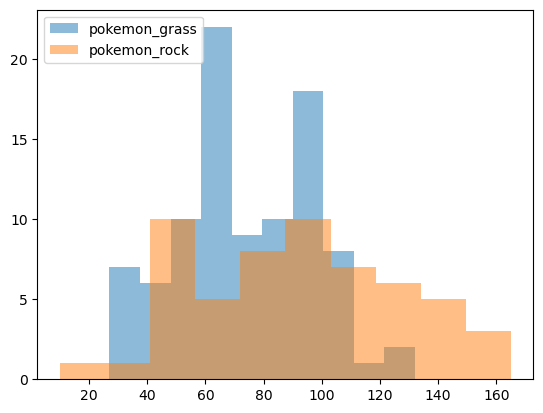

In [15]:
np.random.seed(11)
stat, p = stats.ttest_ind(pokemon_grass['Attack'], pokemon_rock['Attack'])
if p > 0.05:
    print("Не отклоняем нулевую гипотезу, различия в атаке статистически не значимы")
else:
    print("Отклоняем нулевую гипотезу, различия в атаке статистически значимы")

plt.hist(pokemon_grass['Attack'], bins=10, alpha = 0.5, label='pokemon_grass')
plt.hist(pokemon_rock['Attack'], bins=10, alpha = 0.5, label='pokemon_rock')
plt.legend(loc='upper left')

<Axes: >

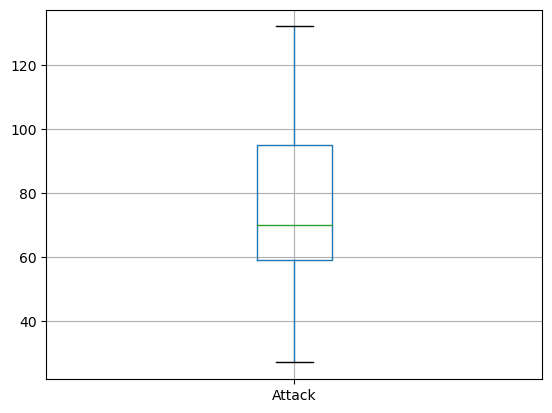

In [64]:
pokemon_grass.boxplot(column='Attack')

<Axes: >

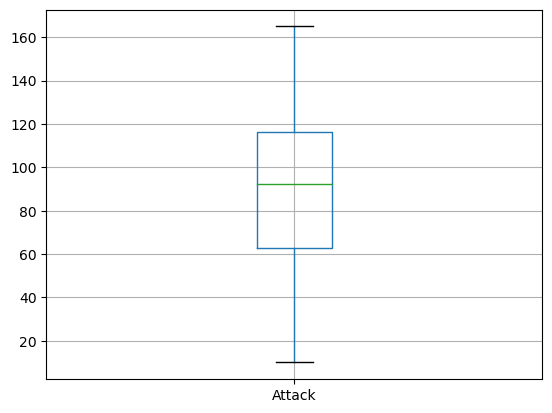

In [55]:
pokemon_rock.boxplot(column='Attack')

Вывод: покемоны в классе `rock` имеют более сильную обычную атаку, чем покемоны в классе `grass`.

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [16]:
pokemon_water = pokemon[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')) | ((pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] != 'Normal'))]
pokemon_normal = pokemon[((pokemon['Class 2'] != 'Water') & (pokemon['Class 1'] == 'Normal')) | ((pokemon['Class 1'] != 'Water') & (pokemon['Class 2'] == 'Normal'))]
print(np.var(pokemon_water['Attack']), np.var(pokemon_normal['Attack']))
#Как правило, мы можем предположить, что совокупности имеют равные дисперсии, если отношение большей выборочной дисперсии к меньшей выборочной дисперсии составляет менее 4:1

790.2365439999998 900.8824625036757


Отклоняем нулевую гипотезу, различия в скорости статистически значимы


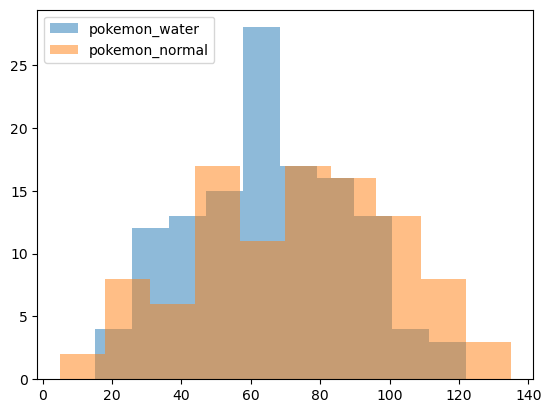

In [17]:
np.random.seed(11)
stat, p = stats.ttest_ind(pokemon_water['Speed'], pokemon_normal['Speed'])
if p > 0.05:
    print("Не отклоняем нулевую гипотезу, различия в скорости статистически не значимы")
else:
    print("Отклоняем нулевую гипотезу, различия в скорости статистически значимы")

plt.hist(pokemon_water['Speed'], bins=10, alpha = 0.5, label='pokemon_water')
plt.hist(pokemon_normal['Speed'], bins=10, alpha = 0.5, label='pokemon_normal')
plt.legend(loc='upper left')

<Axes: >

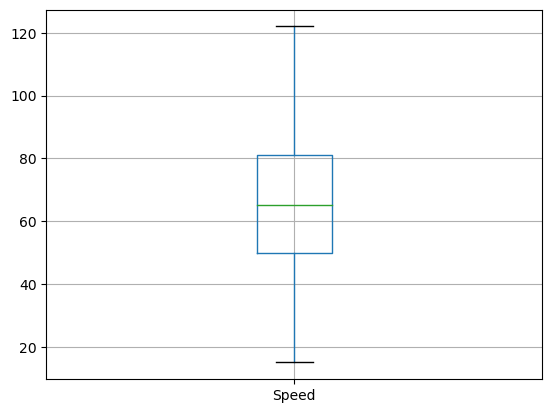

In [59]:
pokemon_water.boxplot(column='Speed')

<Axes: >

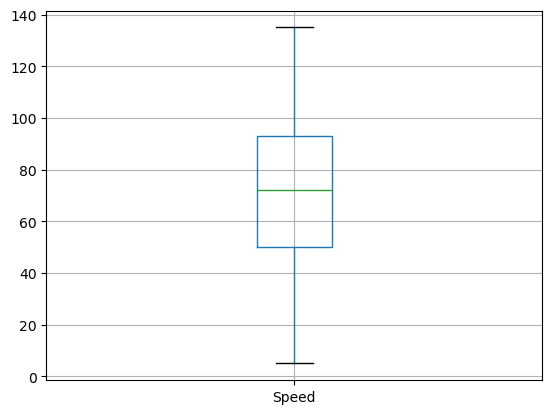

In [60]:
pokemon_normal.boxplot(column='Speed')

Вывод: покемоны в классе `Normal` в среднем быстрее покемонов в классе `Water`.

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [67]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']
pokemon_treathed = pokemon[pokemon['Name'].isin(treathed_pokemon)]
np.random.seed(11)
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = pokemon[~pokemon['Name'].isin(treathed_pokemon)].sample(n=4, replace=True)['Speed'].mean()
    boot_1d.append(boot_mean)

stat, p = stats.ttest_ind(boot_1d, pokemon_treathed['Speed'].mean())
if p > 0.05:
    print("Не отклоняем нулевую гипотезу, различия в скорости статистически не значимы, чтобы говорить о том, что сыворотка работает")
else:
    print("Отклоняем нулевую гипотезу, различия в скорости статистически значимы, сывыротка работает")


Отклоняем нулевую гипотезу, различия в скорости статистически значимы, сывыротка работает


C:\Users\Игнат\AppData\Local\Temp\ipykernel_24772\1462103352.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, p = stats.ttest_ind(boot_1d, pokemon_treathed['Speed'].mean())


<Axes: >

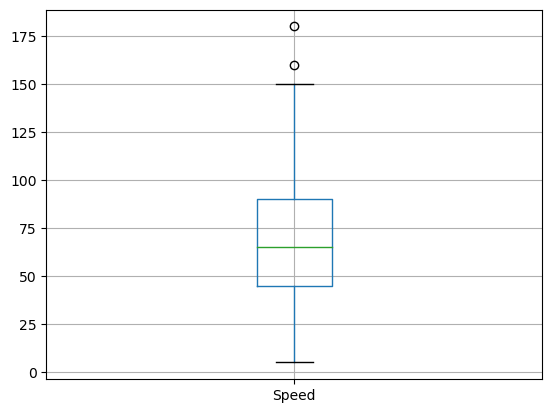

In [69]:
pokemon[~pokemon['Name'].isin(treathed_pokemon)].boxplot(column='Speed')

<Axes: >

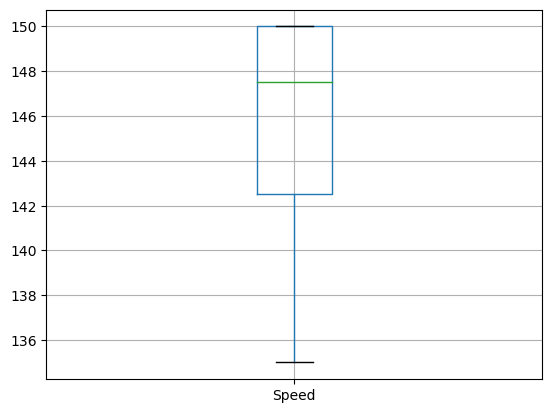

In [72]:
pokemon[pokemon['Name'].isin(treathed_pokemon)].boxplot(column='Speed')

Вывод: Покемоны, принимающие сыворотку, в среднем быстрее

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [19]:
pokemon_legend = pokemon[pokemon['Legendary'] == True]
pokemon_nolegend = pokemon[pokemon['Legendary'] == False]

In [20]:
sum_pokemon_legend = pokemon_legend['HP'] + pokemon_legend['Attack'] + pokemon_legend['Defense']
multiplication_pokemon_legend = pokemon_legend['HP'] * pokemon_legend['Attack'] * pokemon_legend['Defense']
sum_pokemon_nolegend = pokemon_nolegend['HP'] + pokemon_nolegend['Attack'] + pokemon_nolegend['Defense']
multiplication_pokemon_nolegend = pokemon_nolegend['HP'] * pokemon_nolegend['Attack'] * pokemon_nolegend['Defense']

Отклоняем нулевую гипотезу, различия в сумме HP, Attack, Defense статистически значимы


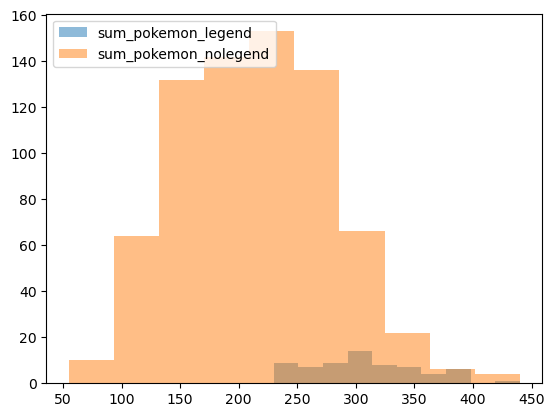

In [21]:
np.random.seed(11)
stat, p = stats.ttest_ind(sum_pokemon_legend, sum_pokemon_nolegend)
if p > 0.05:
    print("Не отклоняем нулевую гипотезу, различия в сумме HP, Attack, Defense статистически не значимы")
else:
    print("Отклоняем нулевую гипотезу, различия в сумме HP, Attack, Defense статистически значимы")

plt.hist(sum_pokemon_legend, bins=10, alpha = 0.5, label='sum_pokemon_legend')
plt.hist(sum_pokemon_nolegend, bins=10, alpha = 0.5, label='sum_pokemon_nolegend')
plt.legend(loc='upper left')

<Axes: >

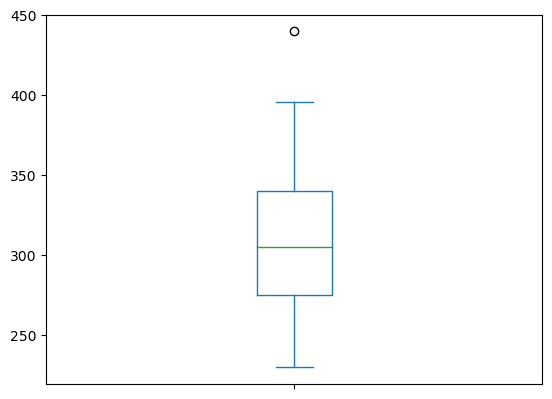

In [86]:
sum_pokemon_legend.plot.box()

<Axes: >

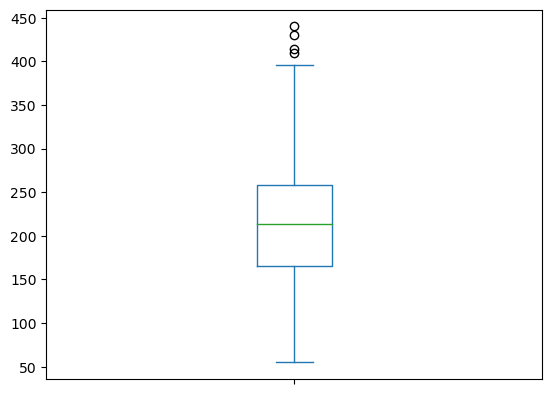

In [87]:
sum_pokemon_nolegend.plot.box()

Отклоняем нулевую гипотезу, различия в произведении HP, Attack, Defense статистически значимы


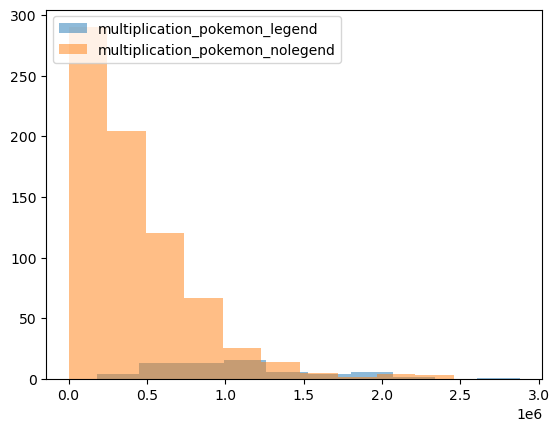

In [22]:
np.random.seed(11)
stat, p = stats.ttest_ind(multiplication_pokemon_legend, multiplication_pokemon_nolegend)
if p > 0.05:
    print("Не отклоняем нулевую гипотезу, различия в произведении HP, Attack, Defense статистически не значимы")
else:
    print("Отклоняем нулевую гипотезу, различия в произведении HP, Attack, Defense статистически значимы")

plt.hist(multiplication_pokemon_legend, bins=10, alpha = 0.5, label='multiplication_pokemon_legend')
plt.hist(multiplication_pokemon_nolegend, bins=10, alpha = 0.5, label='multiplication_pokemon_nolegend')
plt.legend(loc='upper left')

<Axes: >

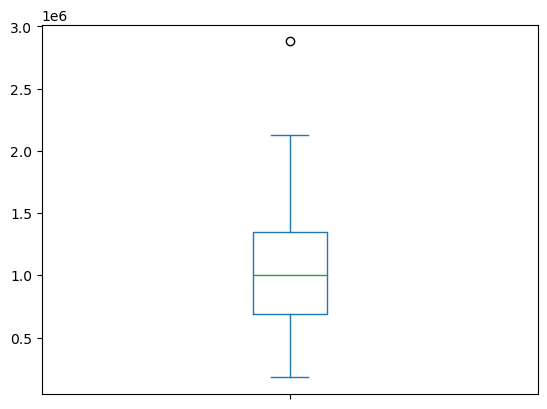

In [88]:
multiplication_pokemon_legend.plot.box()

<Axes: >

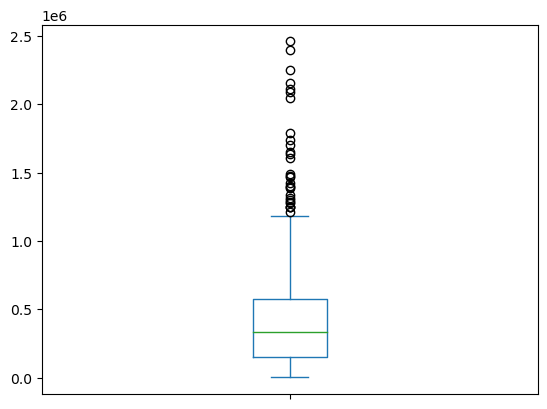

In [95]:
multiplication_pokemon_nolegend.plot.box()

Выводы: Сумма характеристик и произведение `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [23]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [24]:
best_pokemon_rock = np.array(pokemon[((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Ground') & (pokemon['Class 2'] != 'Steel') & (pokemon['Class 2'] != 'Ice'))\
                        | ((pokemon['Class 2'] == 'Rock') & (pokemon['Class 1'] != 'Ground') & (pokemon['Class 1'] != 'Steel') & (pokemon['Class 1'] != 'Ice'))]['Defense'])
best_pokemon_ground = np.array(pokemon[((pokemon['Class 1'] == 'Ground') & (pokemon['Class 2'] != 'Rock') & (pokemon['Class 2'] != 'Steel') & (pokemon['Class 2'] != 'Ice'))\
                        | ((pokemon['Class 2'] == 'Ground') & (pokemon['Class 1'] != 'Rock') & (pokemon['Class 1'] != 'Steel') & (pokemon['Class 1'] != 'Ice'))]['Defense'])
best_pokemon_steel = np.array(pokemon[((pokemon['Class 1'] == 'Steel') & (pokemon['Class 2'] != 'Ground') & (pokemon['Class 2'] != 'Rock') & (pokemon['Class 2'] != 'Ice'))\
                        | ((pokemon['Class 2'] == 'Steel') & (pokemon['Class 1'] != 'Ground') & (pokemon['Class 1'] != 'Rock') & (pokemon['Class 1'] != 'Ice'))]['Defense'])
best_pokemon_ice = np.array(pokemon[((pokemon['Class 1'] == 'Ice') & (pokemon['Class 2'] != 'Ground') & (pokemon['Class 2'] != 'Steel') & (pokemon['Class 2'] != 'Rock'))\
                        | ((pokemon['Class 2'] == 'Ice') & (pokemon['Class 1'] != 'Ground') & (pokemon['Class 1'] != 'Steel') & (pokemon['Class 1'] != 'Rock'))]['Defense'])
print(len(best_pokemon_rock), len(best_pokemon_ground), len(best_pokemon_steel), len(best_pokemon_ice))
#В лекции были даны одинаковые размеры выборок, здесь же они разные, значит будет брать по минимальному количеству 33

41 52 40 33


In [25]:
grand_mean_temp_list = []
mean_rock_temp_list = []
mean_ground_temp_list = []
mean_steel_temp_list = []
ssw_temp_list = []
#Делаем из массива датафрейм
best_pokemon_rock = pd.DataFrame(best_pokemon_rock)
best_pokemon_ground = pd.DataFrame(best_pokemon_ground)
best_pokemon_steel = pd.DataFrame(best_pokemon_steel)
best_pokemon_ice = pd.DataFrame(best_pokemon_ice)
#Проводим бутстреп для оценки среднего в каждом классе и общее среднее среди всех классов
for i in range(1000):
    boot_mean_rock = best_pokemon_rock.sample(n=33, replace=True)
    boot_mean_rock = list(boot_mean_rock[0])
    for c in boot_mean_rock:
        ssw_temp_list.append((c - sum(boot_mean_rock)/len(boot_mean_rock))**2)
    boot_mean_ground = best_pokemon_ground.sample(n=33, replace=True)
    boot_mean_ground = list(boot_mean_ground[0])
    for c in boot_mean_ground:
        ssw_temp_list.append((c - sum(boot_mean_ground)/len(boot_mean_ground))**2)
    boot_mean_steel = best_pokemon_steel.sample(n=33, replace=True)
    boot_mean_steel = list(boot_mean_steel[0])
    for c in boot_mean_steel:
        ssw_temp_list.append((c - sum(boot_mean_steel)/len(boot_mean_steel))**2)
    boot_mean_ice = list(best_pokemon_ice[0])
    for c in boot_mean_ice:
        ssw_temp_list.append((c - sum(boot_mean_ice)/len(boot_mean_ice))**2)
    grand_mean_temp = sum(boot_mean_rock + boot_mean_ground + boot_mean_steel + boot_mean_ice)/(len(boot_mean_rock) + len(boot_mean_ground) + len(boot_mean_steel) + len(boot_mean_ice))
    grand_mean_temp_list.append(grand_mean_temp)
    mean_rock_temp_list.append(sum(boot_mean_rock)/len(boot_mean_rock))
    mean_ground_temp_list.append(sum(boot_mean_ground)/len(boot_mean_ground))
    mean_steel_temp_list.append(sum(boot_mean_steel)/len(boot_mean_steel))

In [26]:
#Рассчитываем среднее в каждом классе и общее среднее
grand_mean = sum(grand_mean_temp_list)/len(grand_mean_temp_list)
mean_rock = sum(mean_rock_temp_list)/len(mean_rock_temp_list)
mean_ground = sum(mean_ground_temp_list)/len(mean_ground_temp_list)
mean_steel = sum(mean_steel_temp_list)/len(mean_steel_temp_list)
mean_ice = sum(boot_mean_ice)/len(boot_mean_ice)
ssw = sum(ssw_temp_list)/len(ssw_temp_list)

In [27]:
ssb = 33*(mean_rock - grand_mean)**2 + 33*(mean_ground - grand_mean)**2 + 33*(mean_steel - grand_mean)**2 + 33*(mean_ice - grand_mean)**2
dfb = 3
dfw = 128
mssb = ssb/dfb
mssw = ssw/dfw
f_value = mssb/mssw
p = stats.f.sf(f_value, dfb, dfw)
if p > 0.05:
    print("Не отклоняем нулевую гипотезу, различия в защите среди этих классов статистически не значимы")
else:
    print("Отклоняем нулевую гипотезу, различия в защите среди этих классов статистически значимы")

Отклоняем нулевую гипотезу, различия в защите среди этих классов статистически значимы
